In [15]:
import numpy as np
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt
from google.colab import files
uploaded=files.upload()

Saving A2Q1Data.csv to A2Q1Data (1).csv


In [16]:
import io
data=pd.read_csv(io.BytesIO(uploaded['A2Q1Data.csv']),header=None)
data

,0
0,0
1,0
2,0
3,1
4,1
...,...
995,0
996,1
997,0
998,1


In [17]:
X=data[0].values.tolist()

In [18]:
avg_ll=[[0 for i in range(10)] for j in range(100)]
for r in range(100):
  a=random.dirichlet(np.ones(4),size=1)
  pi=a[0].tolist()
  p=[]
  K=4
  for i in range(4):
   param_p=random.uniform(0,1)
   p.append(param_p)
  lam=[[0 for i in range(K)] for j in range(len(X))]
  n=len(X)
  for it in range (10):
   lf=0
   for i in range(n):
    sum=0
    for k in range (K):
     sum+=pi[k]*pow(p[k],X[i])*pow((1-p[k]),(1-X[i]))
    lf+=np.log(sum)
   avg_ll[r][it]=lf
   #for k in range(K):
   # p_prev[k]=p[k]
   # pi_prev[k]=pi[k]
  #e_step
   for i in range (n):
    for k in range (K):
     nr=pow(p[k],X[i])*pow((1-p[k]),(1-X[i]))*pi[k]
     dr=0
     for l in range(K):
      dr=dr+pow(p[l],X[i])*pow((1-p[l]),(1-X[i]))*pi[l]
     lam[i][k]=nr/dr
  #m_step
   for k in range(K):
    N=0
    pnr=0
    for i in range(n):
     N=N+lam[i][k]
     pnr=pnr+(lam[i][k]*X[i])
    p[k]=pnr/N
    pi[k]=N/n

In [19]:
print(pi)
print(p)

[0.328752968008686, 0.3331185528656518, 0.01455022022899296, 0.3235782588966608]
[0.5271650966417621, 0.059841213736967803, 0.7159118174477734, 0.6407785783422052]


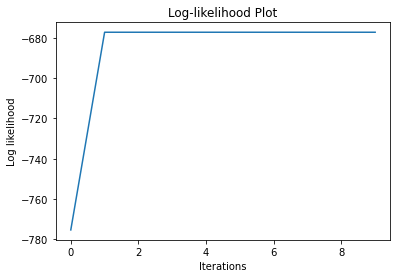

In [20]:
#print (np.mean(avg_ll,axis=0))
plt.title('Log-likelihood Plot')
plt.xlabel('Iterations')
plt.ylabel('Log likelihood')
plt.plot(np.mean(avg_ll,axis=0))